In [1]:
from pyopenms import *
import matplotlib.pyplot as plt

In [2]:
protein_ids = []
peptide_ids = []
SimpleSearchEngineAlgorithm().search("Fusion_180220_40.mzML", "Scerevisiae_UPS2_1802.fasta", protein_ids, peptide_ids)
exp = MSExperiment()
MzMLFile().load("Fusion_180220_40.mzML", exp)
filtered = MSExperiment()
for s in exp:
    if s.getMSLevel() == 2:
        filtered.addSpectrum(s)

In [3]:
def mirror_plot(obs_mz, obs_int, theo_mz, theo_int, title):
            obs_int = [element / max(obs_int) for element in obs_int] 
            theo_int = [element * -1 for element in theo_int] 
            plt.figure(figsize=(12,8))
            plt.bar(obs_mz, obs_int, width = 3.0)
            plt.bar(theo_mz, theo_int, width = 3.0)
            plt.title(title)
            plt.ylabel('intensity')
            plt.xlabel('m/z')

Peptide ID m/z: 823.360046386719
 - Peptide hit rank: 1
 - Peptide hit sequence: DPHAYISGDIMEC(Carbamidomethyl)M(Oxidation)AASDNVVR
Number of matched peaks: 7
ion	theo. m/z	observed m/z
y5++	2	301.66646515262096	301.2539978027344
y12++	2	699.7941580132209	699.5878295898438
b13++	2	745.307955664171	745.3740844726562
y7+	1	760.394797157471	760.8161010742188
b7+	1	784.362434029871	784.3724975585938
b8+	1	841.383898125571	841.3811645507812
y15++	2	842.3603943162709	842.1452026367188
Peptide ID m/z: 561.787231445313
 - Peptide hit rank: 1
 - Peptide hit sequence: M(Oxidation)NLDLGSTVR
Number of matched peaks: 4
ion	theo. m/z	observed m/z
y4+	1	462.26707558327104	462.330322265625
b9++	2	474.22877038447103	474.64306640625
y9++	2	487.766908599221	488.0548095703125
y9+	1	974.526540731671	974.5310668945312
Peptide ID m/z: 1020.010375976563
 - Peptide hit rank: 1
 - Peptide hit sequence: MVYEATPFDPITVKPSDK
Number of matched peaks: 7
ion	theo. m/z	observed m/z
y15++	2	822.9276073329212	823.2462158

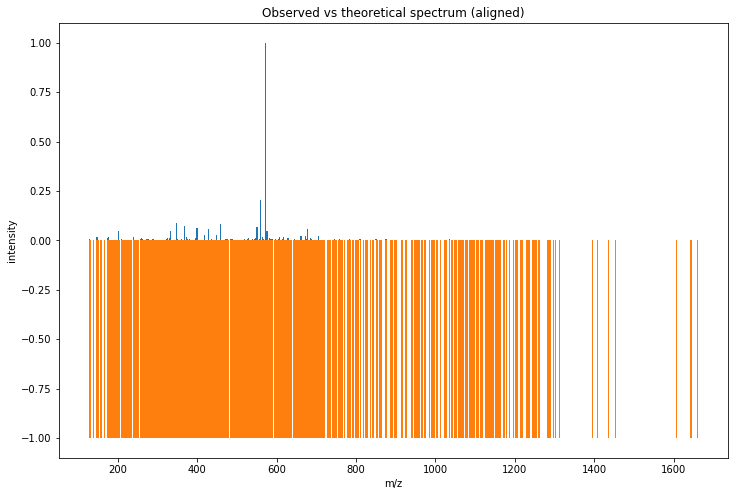

In [4]:
theo_mz, theo_int, obs_mz, obs_int = [], [], [], []
for peptide_id in peptide_ids[0:100]:
    print (35*"=")
    print ("Peptide ID m/z:", peptide_id.getMZ()) 
    for hit in peptide_id.getHits():
        print(" - Peptide hit rank:", hit.getRank())
        print(" - Peptide hit sequence:", hit.getSequence())  
        spectra = filtered.getSpectrum(peptide_id.getMetaValue("scan_index"))
        tsg = TheoreticalSpectrumGenerator()
        thspec = MSSpectrum()
        p = Param()
        p.setValue("add_metainfo", "true")
        tsg.setParameters(p)
        peptide = AASequence.fromString(hit.getSequence().toString())
        tsg.getSpectrum(thspec, peptide, 1, 2)
        
        alignment = []
        spa = SpectrumAlignment()
        p = spa.getParameters()
        
        p.setValue("tolerance", 0.5)
        p.setValue("is_relative_tolerance", "false")
        spa.setParameters(p)

        spa.getSpectrumAlignment(alignment, thspec, spectra)

        print("Number of matched peaks: " + str(len(alignment)))
        print("ion\ttheo. m/z\tobserved m/z")
        for theo_idx, obs_idx in alignment:
            ion_name = thspec.getStringDataArrays()[0][theo_idx].decode()
            ion_charge = thspec.getIntegerDataArrays()[0][theo_idx]
            print(ion_name + "\t" + str(ion_charge) + "\t"
                  + str(thspec[theo_idx].getMZ())
                  + "\t" + str(spectra[obs_idx].getMZ()))

        
        for theo_idx, obs_idx in alignment:
            theo_mz.append(thspec[theo_idx].getMZ())
            theo_int.append(thspec[theo_idx].getIntensity())
            obs_mz.append(spectra[obs_idx].getMZ())
            obs_int.append(spectra[obs_idx].getIntensity())
title = 'Observed vs theoretical spectrum (aligned)'
mirror_plot(obs_mz, obs_int, theo_mz, theo_int, title)

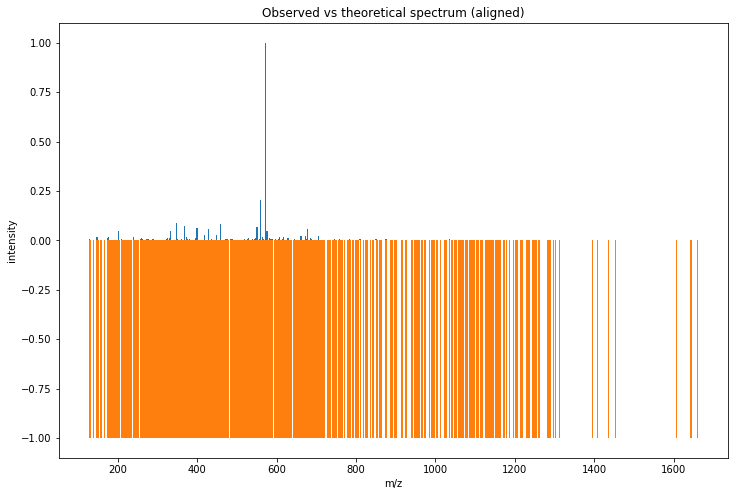

In [5]:
title = 'Observed vs theoretical spectrum (aligned)'
mirror_plot(obs_mz, obs_int, theo_mz, theo_int, title)